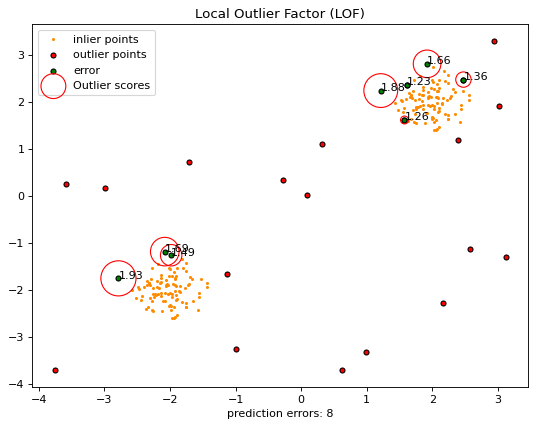

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.pyplot import figure

np.random.seed(42)

# Generate train data
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

# Generate some outliers
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

n_outliers = len(X_outliers)
ground_truth = np.ones(len(X), dtype=int)
ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(X)

mask = y_pred != ground_truth
n_errors = mask.sum()
X_scores = clf.negative_outlier_factor_

X_lof = X_scores[mask]
x = X[mask]

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.title('Local Outlier Factor (LOF)')
plt.xlabel('prediction errors: %d' % (n_errors))

plt.scatter(X_inliers[:, 0], X_inliers[:, 1],
            color='darkorange', s=3., label='inlier points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1],
            color='red', s=20., edgecolor='k', label='outlier points')
plt.scatter(x[:, 0], x[:, 1],
            color='green', s=20., edgecolor='k', label='error')

# plot circles with radius proportional to the outlier scores
radius = (X_lof.max() - X_lof) / (X_lof.max() - X_lof.min())
plt.scatter(x[:, 0], x[:, 1], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')

for i, s in enumerate(np.round(X_lof, 2)):
    plt.annotate(abs(s), (x[i, 0], x[i, 1]))

legend = plt.legend(loc='upper left')
plt.show()